In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
%matplotlib inline
# img = cv.imread('lena_colour.png')
img = cv.imread('ball.jpg')


(<matplotlib.axes._subplots.AxesSubplot at 0x7efcb30f37d0>,
 <matplotlib.image.AxesImage at 0x7efcb4753550>)

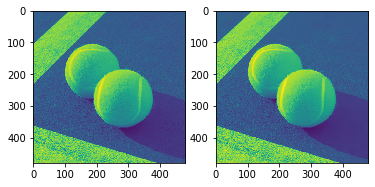

In [2]:
# convert to gray scale
img_gray = cv.cvtColor(img,cv.COLOR_RGB2GRAY)

# apply NLM filter
nlm_img = cv.fastNlMeansDenoising(img_gray)

plt.subplot(121),plt.imshow(img_gray)
plt.subplot(122),plt.imshow(nlm_img)

In [3]:
# create 2D histogram
fxy = np.zeros((256,256))
for i in range(img_gray.shape[0]):
    for j in range(img_gray.shape[1]):
        c = img_gray[i][j]
        d = nlm_img[i][j]
        fxy[c][d] = fxy[c][d] +1

pxy = fxy/(img_gray.shape[0]*img_gray.shape[1])

In [4]:
# GSA
import GSA as gsa
import benchmarks
import csv
import numpy
import time


def selector(algo,func_details,popSize,Iter,pxy):
    function_name=func_details[0]
    lb=func_details[1]
    ub=func_details[2]
    dim=func_details[3]
    

    if(algo==0):
        x=gsa.GSA(lb,ub,dim,popSize,Iter,pxy)    
    return x


In [5]:
# Select optimizers
GSA= True 
# Select benchmark function
#F1=True
Entropy = True


Algorithm=[GSA]
objectivefunc=[Entropy] 
        
# Select number of repetitions for each experiment. 
# To obtain meaningful statistical results, usually 30 independent runs 
# are executed for each algorithm.
Runs=1

# Select general parameters for all optimizers (population size, number of iterations)
#PopSize = 50
#iterations= 100 #1000

#Export results ?
Export=False #True


#ExportToFile="YourResultsAreHere.csv"
#Automaticly generated name by date and time
ExportToFile="experiment"+time.strftime("%Y-%m-%d-%H-%M-%S")+".csv" 

# Check if it works at least once
atLeastOneIteration=False


In [6]:
partitionLevels=1; 
if partitionLevels==1:
    number_of_levels=4;

    
level=number_of_levels


In [7]:
d = level-1
NumberOfThresholdValues=2*d
thdim=NumberOfThresholdValues
Lmax=254
XVmax = Lmax*np.ones((1,NumberOfThresholdValues))
XVmin = np.zeros((1,NumberOfThresholdValues))

In [8]:
PopSize = int((thdim/2)*10)
iterations=2000

In [13]:

# CSV Header for for the convergence 
CnvgHeader=[]

for l in range(0,iterations):
    CnvgHeader.append("Iter"+str(l+1))


for i in range (0, len(Algorithm)):
    for j in range (0, len(objectivefunc)):
        if((Algorithm[i]==True) and (objectivefunc[j]==True)): # start experiment if an Algorithm and an objective function is selected
            for k in range (0,Runs):
                
                func_details=benchmarks.getFunctionDetails(j)
                func_details[0]="entropy"
                func_details[1] = XVmin
                func_details[2] = XVmax
                #func_details[3] = thdim
                func_details[3] = 2
                
                x=selector(i,func_details,PopSize,iterations,pxy)
                
                if(Export==True):
                    with open(ExportToFile, 'a') as out:
                        writer = csv.writer(out,delimiter=',')
                        if (atLeastOneIteration==False): # just one time to write the header of the CSV file
                            header= numpy.concatenate([["Optimizer","objfname","startTime","EndTime","ExecutionTime"],CnvgHeader])
                            writer.writerow(header)
                        a=numpy.concatenate([[x.Algorithm,x.objectivefunc,x.startTime,x.endTime,x.executionTime],x.convergence])
                        writer.writerow(a)
                    out.close()
                atLeastOneIteration=True # at least one experiment

print("Best Individual is : "+ str(x.bestIndividual))                
if (atLeastOneIteration==False): # Faild to run at least one experiment
    print("No Optomizer or Cost function is selected. Check lists of available optimizers and cost functions") 
        
        


GSA is optimizing  "Renyi entropy"
['At iteration 0 the best fitness is 12.684476231409496']
At iteration 0 the gBest valve [[ 53  98  64  99]
 [ 41  86  16  62]
 [ 95 161 221 224]
 [100 197  46  61]
 [ 39 100 169 186]
 [ 29  84  27  57]
 [ 55 190   1 131]
 [132 221  71 147]
 [120 160  65 212]
 [ 55 189 128 149]
 [ 89 146 157 226]
 [166 217 183 250]
 [ 72 193   6  85]
 [ 56 168 123 141]
 [199 226  33 218]
 [ 98 203  83  87]
 [ 29  61 106 224]
 [ 77 164 108 146]
 [ 94 182  72 173]
 [ 86 137  94 240]
 [ 42 100  15 252]
 [ 78 174  86  94]
 [ 47 127  12 241]
 [133 221  70 109]
 [195 226 168 251]
 [102 197 107 218]
 [ 57 187 101 226]
 [ 91 181  18 215]
 [ 63 174 145 151]
 [116 182  30  88]]
['At iteration 100 the best fitness is 4.960390932093858']
At iteration 100 the gBest valve [[ 43 129  64  99]
 [ 45 135  16  62]
 [ 45 138 221 224]
 [ 45 128  46  61]
 [ 37 132 169 186]
 [ 46 138  27  57]
 [ 49 133   1 131]
 [ 51 132  71 147]
 [ 40 137  65 212]
 [ 37 133 128 149]
 [ 44 133 157 226]
 [ 4

['At iteration 1300 the best fitness is -68.65331957374916']
At iteration 1300 the gBest valve [[  0   0  64  99]
 [  0   0  16  62]
 [  0   0 221 224]
 [  0   0  46  61]
 [  0   0 169 186]
 [  0   0  27  57]
 [  0   0   1 131]
 [  0   0  71 147]
 [  0   0  65 212]
 [  0   0 128 149]
 [  0   0 157 226]
 [  0   0 183 250]
 [  0   0   6  85]
 [  0   0 123 141]
 [  0   0  33 218]
 [  0   0  83  87]
 [  0   0 106 224]
 [  0   0 108 146]
 [  0   0  72 173]
 [  0   0  94 240]
 [  0   0  15 252]
 [  0   0  86  94]
 [  0   0  12 241]
 [  0   0  70 109]
 [  0   0 168 251]
 [  0   0 107 218]
 [  0   0 101 226]
 [  0   0  18 215]
 [  0   0 145 151]
 [  0   0  30  88]]
['At iteration 1400 the best fitness is -68.65331957374916']
At iteration 1400 the gBest valve [[  0   0  64  99]
 [  0   0  16  62]
 [  0   0 221 224]
 [  0   0  46  61]
 [  0   0 169 186]
 [  0   0  27  57]
 [  0   0   1 131]
 [  0   0  71 147]
 [  0   0  65 212]
 [  0   0 128 149]
 [  0   0 157 226]
 [  0   0 183 250]
 [  0   0  